In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

In [32]:
cd drive/MyDrive/데이터 분석/data

[Errno 2] No such file or directory: 'drive/MyDrive/데이터 분석/data'
/content/drive/MyDrive/데이터 분석/data


In [2]:
df= pd.read_csv('서울특별시 사회복지시설 목록.csv',encoding='cp949')

# 정리

In [3]:
#경기도 제거
df= df.drop(['시설코드','시군구코드'], axis=1)
df= df.drop([1508,1581,1663,1688,1966], axis=0)
df.head()

,시설명,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,시군구명,시설주소
0,서울꽃동네신내노인요양원,(노인) 노인요양시설,노인의료복지시설,자치구,최은숙,중랑구,서울특별시 중랑구 신내로 194
1,청운양로원,(노인) 양로시설,노인주거복지시설,자치구,이종명,종로구,서울특별시 종로구 비봉길 76 (구기동)
2,청운노인요양원,(노인) 노인요양시설,노인의료복지시설,자치구,이종후,종로구,서울특별시 종로구 비봉길 76 (구기동)
3,홍파양로원,(노인) 양로시설,노인주거복지시설,자치구,김우리,노원구,서울특별시 노원구 동일로248길 30 (상계동)
4,천사노인요양원,(노인) 노인요양시설,노인의료복지시설,자치구,김샛별,강서구,서울특별시 강서구 강서로45다길 30-22


In [4]:
#시군구명 수정
df.reset_index(inplace=True, drop=True)
df[df['시군구명'].str.contains('서울')]

,시설명,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,시군구명,시설주소
495,한국아동복지시설연합회,(아동) 아동양육시설,아동복지시설,자치구,성준경,서울특별시,서울특별시 용산구 갈월동 용산빌딩
1505,서울특별시립장애인영농직업재활시설,(장애인) 장애인보호작업장,장애인직업재활시설,자치구,장경언,서울특별시,경기도 남양주시 진접읍 양진로725
1578,서울시립영보자애원,(노숙인등) 노숙인요양시설,노숙인등생활시설,자치구,남숙자,서울특별시,경기도 용인시 처인구 이원로 483-0 .이동면 서울특별시립영보자애원
1659,서울시립영보정신요양원,(정신보건) 정신요양시설,정신요양시설,자치구,정미현,서울특별시,경기 용인시 처인구 이동면 이원로483
1683,애림원,(노인) 양로시설,노인주거복지시설,자치구,이상순,서울특별시,경기도 시흥시 동서로 895-6 (물왕동)
1728,행복이가득한집2호,(장애인) 장애인공동생활가정,장애인거주시설,자치구,김세룡,서울특별시,서울특별시 강서구 월정로18길 20401 (화곡동)(화곡동)
1855,(사)굿하트데이케어센터,(노인) 재가노인복지시설,재가노인복지시설,자치구,길준영,서울특별시,서울특별시 동작구 상도로 121영진빌딩 4층(상도동) (상도동)
1961,서울시립 영보노인요양원,(노인) 노인요양시설,노인의료복지시설,자치구,김재성,서울특별시,경기도 용인시 처인구 이동면 이원로483
2130,서울시학대피해노인전용쉼터,(노인) 노인보호전문기관,노인보호전문기관,자치구,손세영,서울특별시,서울특별시 도봉구 도봉로108길 83-5 301호 (창동)
2852,서울시건강가정지원센터,(건강가정) 건강가정지원센터,건강가정지원센터,자치구,계선자,서울특별시,서울특별시 중구 소파로4길 6 (예장동)(예장동)


In [5]:
df.loc[df.시설명 == '한국아동복지시설연합회', ('시군구명')] = '용산구'
df.loc[df.시설명 == '행복이가득한집2호', ('시군구명')] = '강서구'
df.loc[df.시설명 == '(사)굿하트데이케어센터', ('시군구명')] = '동작구'
df.loc[df.시설명 == '서울시학대피해노인전용쉼터', ('시군구명')] = '도봉구'
df.loc[df.시설명 == '서울시건강가정지원센터', ('시군구명')] = '중구'
df.loc[df.시설명 == '서울시정신보건센터', ('시군구명')] = '강남구'

In [6]:
df= df.rename(columns={'시군구명':'자치구'})

# groupby

In [7]:
df_old= df[df['시설종류명(시설유형)'].str.contains('노인')]
df_old.head()

,시설명,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,자치구,시설주소
0,서울꽃동네신내노인요양원,(노인) 노인요양시설,노인의료복지시설,자치구,최은숙,중랑구,서울특별시 중랑구 신내로 194
1,청운양로원,(노인) 양로시설,노인주거복지시설,자치구,이종명,종로구,서울특별시 종로구 비봉길 76 (구기동)
2,청운노인요양원,(노인) 노인요양시설,노인의료복지시설,자치구,이종후,종로구,서울특별시 종로구 비봉길 76 (구기동)
3,홍파양로원,(노인) 양로시설,노인주거복지시설,자치구,김우리,노원구,서울특별시 노원구 동일로248길 30 (상계동)
4,천사노인요양원,(노인) 노인요양시설,노인의료복지시설,자치구,김샛별,강서구,서울특별시 강서구 강서로45다길 30-22


In [8]:
df_chi= df[df['시설종류명(시설유형)'].str.contains('아동')]
df_chi.head()

,시설명,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,자치구,시설주소
456,구세군서울후생원,(아동) 아동양육시설,아동복지시설,자치구,김호규,서대문구,서울특별시 서대문구 독립문로8길 41(영천동)
457,남산원,(아동) 아동양육시설,아동복지시설,자치구,박흥식,중구,서울특별시 중구 소파로2길 31남산원
458,송죽원,(아동) 아동양육시설,아동복지시설,자치구,권명심,서대문구,서울특별시 서대문구 송죽길 23
459,강동꿈마을,(아동) 아동양육시설,아동복지시설,자치구,최은미,강동구,서울특별시 강동구 천호대로186길 21 (둔촌동)
460,리라아동복지관,(아동) 아동양육시설,아동복지시설,자치구,김두식,중구,경기도 안성시 용소길 65-0리라아동복지관


In [9]:
df_dis= df[df['시설종류명(시설유형)'].str.contains('장애인')]
df_dis.head()

,시설명,시설종류명(시설유형),시설종류상세명(시설종류),자치구(시)구분,시설장명,자치구,시설주소
190,송파구방이복지관,(장애인) 장애인복지관,장애인지역사회재활시설,자치구,김진숙,송파구,서울특별시 송파구 오금로11길 68
197,서울시각장애인복지관,(장애인) 장애인복지관,장애인지역사회재활시설,자치구,허경아,송파구,서울특별시 송파구 삼학사로19길 27
198,서울시립발달장애인복지관,(장애인) 장애인복지관,장애인지역사회재활시설,자치구,최선자,동작구,서울특별시 동작구 여의대방로20길 33-0395(보라매공원내)
203,청음복지관,(장애인) 장애인복지관,장애인지역사회재활시설,자치구,심계원,강남구,서울특별시 강남구 봉은사로50길 6
204,마포장애인종합복지관,(장애인) 장애인복지관,장애인지역사회재활시설,자치구,김명규,마포구,서울특별시 마포구 성산로4길 353층(마포장애인종합복지관)(성산동)


# 시각화

In [65]:
df_co= df.groupby(['자치구'])['시설명'].count()
df_co= df_co.reset_index()
loca= df_co.rename(columns={'시설명':'수'})
loca= loca.sort_values(by=['수'], axis=0,ascending=False)

px.bar(loca, x='자치구', y='수',
        title= '<b>서울 복지시설 수<b>', theme ="white")

TypeError: bar() got an unexpected keyword argument 'theme'

In [70]:
!pip install cufflinks
!pip install chart_studio

  Created wheel for cufflinks: filename=cufflinks-0.17.3-py3-none-any.whl size=68727 sha256=2d4bb4c9faddacb067c55e83c4c4d0e71ed2a8d33d12f2f243a9efe5f81eb516
  Stored in directory: c:\users\inhyun\appdata\local\pip\cache\wheels\6b\76\62\6da97734911ffcbdd559fd1a3f28526321f0ae699182a23866
Successfully built cufflinks
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11434 sha256=deff2db6187646bcafbb23cab883c3e1d52ddf9ca5c582adb11c85b48166b5c3
  Stored in directory: c:\users\inhyun\appdata\local\pip\cache\wheels\c4\a7\48\0a434133f6d56e878ca511c0e6c38326907c0792f67b476e56
Successfully built retrying


In [75]:
import chart_studio.plotly as py
import cufflinks as cf
cf.go_offline(connected=True)

In [74]:
cf.getThemes()

['ggplot', 'pearl', 'solar', 'space', 'white', 'polar', 'henanigans']

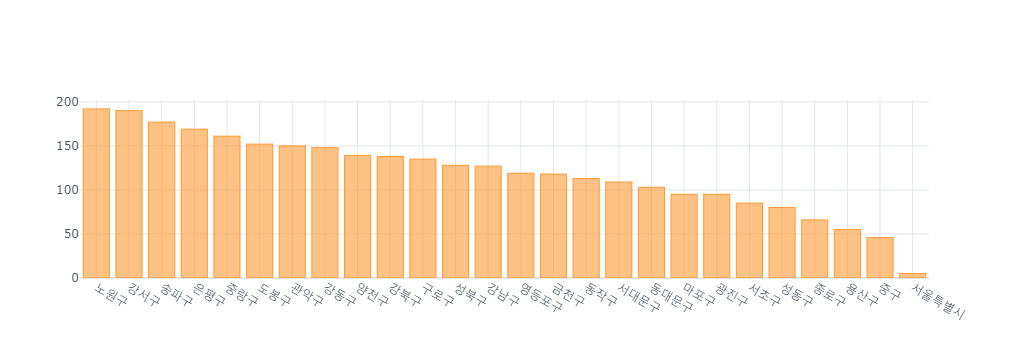

In [79]:
loca.iplot(kind ="bar", x='자치구', y='수', theme="white")

In [80]:
cf.help("bar")

BAR
Bar Chart
Supports categories and horizontal bar charts


Parameters:
    bargap : float
        Sets the gap between bars
        	[0,1)
    bargroupgap : float
        Sets the gap between groups
        	[0,1)
    barmode : string
        Bar mode
        	group
        	stack
        	overlay
    categories : string
        Name of the column that contains the categories
    orientation : string
        Sets the orientation of the bars.
        	h
        	v
    sortbars : bool
        Sort bars in descending order


    colors : dict, list or string
        Trace color
        	string : applies to all traces
        	list : applies to each trace in the order specified
        	dict : {column:value} for each column in the dataframe
        values
        	colorname : see cufflinks.colors.cnames
        	hex : '#ffffff'
        	rgb : 'rgb(23,50,23)'
        	rgba : 'rgba(23,50,23,.5)
    colorscale : string
        Color scale name
        If the color is preceded by a minus (-

In [44]:
서울복지시설수 = px.bar(loca, x='자치구', y='수', title= '<b>서울 복지시설 수<b>')
print(서울복지시설수)
서울복지시설수.write_json("서울복지시설수.json", pretty=True )

Figure({
    'data': [{'alignmentgroup': 'True',
              'hovertemplate': '자치구=%{x}<br>수=%{y}<extra></extra>',
              'legendgroup': '',
              'marker': {'color': '#636efa', 'pattern': {'shape': ''}},
              'name': '',
              'offsetgroup': '',
              'orientation': 'v',
              'showlegend': False,
              'textposition': 'auto',
              'type': 'bar',
              'x': array(['노원구', '강서구', '송파구', '은평구', '중랑구', '도봉구', '관악구', '강동구', '양천구', '강북구',
                          '구로구', '성북구', '강남구', '영등포구', '금천구', '동작구', '서대문구', '동대문구', '마포구', '광진구',
                          '서초구', '성동구', '종로구', '용산구', '중구', '서울특별시'], dtype=object),
              'xaxis': 'x',
              'y': array([192, 190, 177, 169, 161, 152, 150, 148, 139, 138, 135, 128, 127, 119,
                          118, 113, 109, 103,  95,  95,  85,  80,  66,  55,  46,   5], dtype=int64),
              'yaxis': 'y'}],
    'layout': {'barmode': 'relative',
          

In [51]:
test = 서울복지시설수.to_json("서울복지시설수.json",pretty=True, remove_uids=True)
## temp = pxBarToJson.to_json("pxBar.json")
test = test.encode('utf-8')
test = test.decode('unicode_escape')
print(test)
with ("서울복지시설수.json", "w") as f:
    f.write(test)

{
  "data": [
    {
      "alignmentgroup": "True",
      "hovertemplate": "자치구=%{x}<br>수=%{y}<extra></extra>",
      "legendgroup": "",
      "marker": {
        "color": "#636efa",
        "pattern": {
          "shape": ""
        }
      },
      "name": "",
      "offsetgroup": "",
      "orientation": "v",
      "showlegend": false,
      "textposition": "auto",
      "type": "bar",
      "x": [
        "노원구",
        "강서구",
        "송파구",
        "은평구",
        "중랑구",
        "도봉구",
        "관악구",
        "강동구",
        "양천구",
        "강북구",
        "구로구",
        "성북구",
        "강남구",
        "영등포구",
        "금천구",
        "동작구",
        "서대문구",
        "동대문구",
        "마포구",
        "광진구",
        "서초구",
        "성동구",
        "종로구",
        "용산구",
        "중구",
        "서울특별시"
      ],
      "xaxis": "x",
      "y": [
        192,
        190,
        177,
        169,
        161,
        152,
        150,
        148,
        139,
        138,
        135,
        128,
    

AttributeError: __enter__

In [ ]:
pxBarToJson = px.bar(loca, y='수', x='위치', labels={'수':'', '위치':''}, title= '<b>전국 CCTV 수<b>')
temp = pxBarToJson.to_json("pxBar.json")
temp = temp.encode('utf-8')
temp = temp.decode('unicode_escape')
print(temp)

In [23]:
test = 서울복지시설수
test.replace("Figure(", "")
print(test)

AttributeError: 'Figure' object has no attribute 'replace'

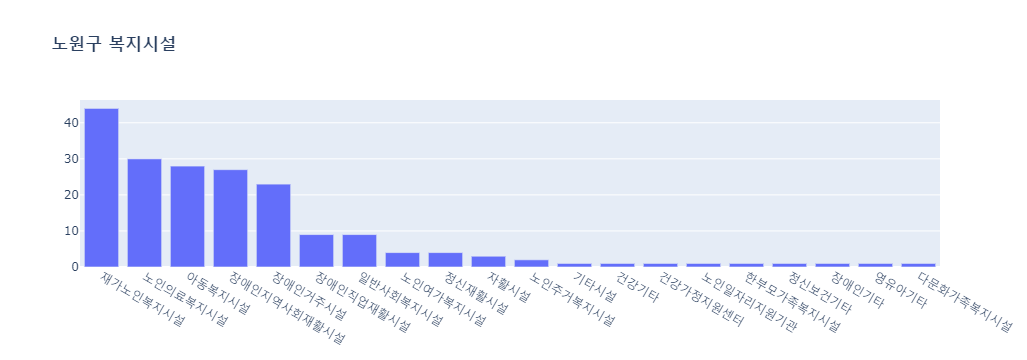

In [13]:
t= df.groupby(['자치구','시설종류상세명(시설종류)'])['자치구(시)구분'].count()
t= t.reset_index()
t= t.rename(columns={'자치구(시)구분':'수','시설종류상세명(시설종류)':'시설종류'})
t= t.sort_values(by=['수'], axis=0,ascending=False)

# 노원, 강서, 송파가 복지시설이 많았기에 각각의 구는 어떤 종류가 많은지 확인하기 위해.
# 노인 관련 시설이 가장 많다.

trace1= go.Bar(x= t[t['자치구'] == '노원구'].시설종류, y=t[t['자치구'] == '노원구'].수)
layout = go.Layout(title='<b>노원구 복지시설<b>')
fig = go.Figure(trace1, layout=layout)

fig.show()

In [52]:
노원구복지시설 = fig
print(노원구복지시설)
노원구복지시설.write_json("노원구복지시설.json", pretty=True )

Figure({
    'data': [{'type': 'bar',
              'x': array(['재가노인복지시설', '장애인지역사회재활시설', '아동복지시설', '일반사회복지시설', '노인의료복지시설', '노인주거복지시설',
                          '건강가정지원센터', '노인여가복지시설', '장애인거주시설', '정신재활시설', '자활시설', '정신보건기타',
                          '장애인직업재활시설', '다문화가족복지시설', '건강기타', '노숙인등이용시설', '노숙인등생활시설'], dtype=object),
              'y': array([9, 8, 7, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)}],
    'layout': {'template': '...', 'title': {'text': '<b>중구 복지시설<b>'}}
})


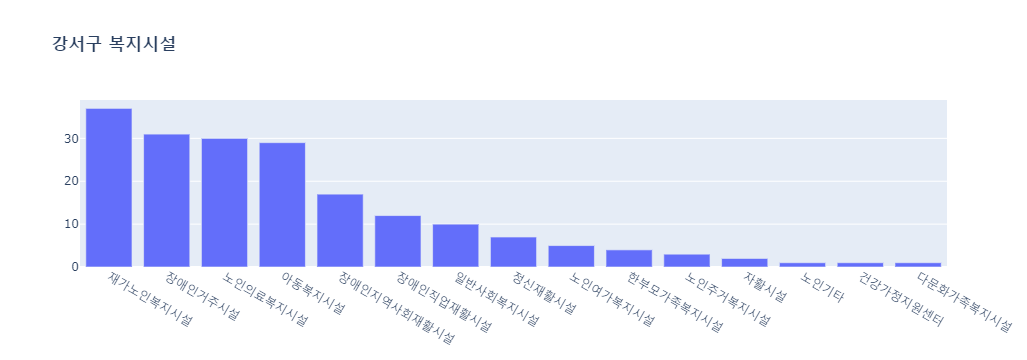

In [15]:
# 노원구와는 다르게 노인복지시설 다음으로 장애인 거주시설이 많다.

trace1= go.Bar(x= t[t['자치구'] == '강서구'].시설종류, y=t[t['자치구'] == '강서구'].수)
layout = go.Layout(title='<b>강서구 복지시설<b>')
fig = go.Figure(trace1, layout=layout)

fig.show()

In [57]:
강남구복지시설 = fig
print(강남구복지시설)
강남구복지시설.write_json("강남구복지시설.json", pretty=True)

Figure({
    'data': [{'type': 'bar',
              'x': array(['재가노인복지시설', '장애인지역사회재활시설', '아동복지시설', '일반사회복지시설', '노인의료복지시설', '노인주거복지시설',
                          '건강가정지원센터', '노인여가복지시설', '장애인거주시설', '정신재활시설', '자활시설', '정신보건기타',
                          '장애인직업재활시설', '다문화가족복지시설', '건강기타', '노숙인등이용시설', '노숙인등생활시설'], dtype=object),
              'y': array([9, 8, 7, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)}],
    'layout': {'template': '...', 'title': {'text': '<b>중구 복지시설<b>'}}
})


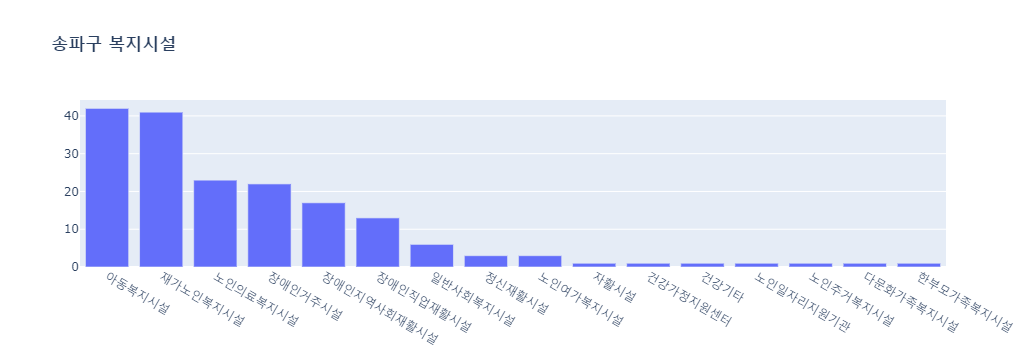

In [17]:
# 아동복지시설이 가장 많다.
trace1= go.Bar(x= t[t['자치구'] == '송파구'].시설종류, y=t[t['자치구'] == '송파구'].수)
layout = go.Layout(title='<b>송파구 복지시설<b>')
fig = go.Figure(trace1, layout=layout)

fig.show()

In [58]:
송파구복지시설 = fig
print(송파구복지시설)
송파구복지시설.write_json("송파구복지시설.json", pretty=True )

Figure({
    'data': [{'type': 'bar',
              'x': array(['재가노인복지시설', '장애인지역사회재활시설', '아동복지시설', '일반사회복지시설', '노인의료복지시설', '노인주거복지시설',
                          '건강가정지원센터', '노인여가복지시설', '장애인거주시설', '정신재활시설', '자활시설', '정신보건기타',
                          '장애인직업재활시설', '다문화가족복지시설', '건강기타', '노숙인등이용시설', '노숙인등생활시설'], dtype=object),
              'y': array([9, 8, 7, 3, 3, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64)}],
    'layout': {'template': '...', 'title': {'text': '<b>중구 복지시설<b>'}}
})


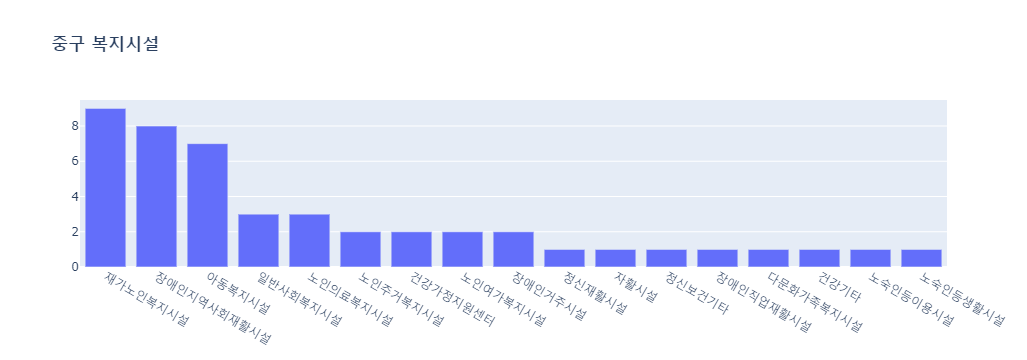

In [19]:
# 제일 시설 수가 적은 중구를 확인해보니 이곳은 노인 복지시설이 많다.

trace1= go.Bar(x= t[t['자치구'] == '중구'].시설종류, y=t[t['자치구'] == '중구'].수)
layout = go.Layout(title='<b>중구 복지시설<b>')
fig = go.Figure(trace1, layout=layout)

fig.show()
fig.write_json("중국복지시설.json", pretty=True )

In [60]:
fig.write_json("중국복지시설.json", pretty=True )


## 노인

In [61]:
old= df_old.groupby(['자치구','시설종류상세명(시설종류)'])['자치구(시)구분'].count()
n= old.reset_index()
df_o= n.rename(columns={'자치구(시)구분':'수','시설종류상세명(시설종류)':'시설종류'})
df_o= df_o.groupby(by='시설종류').sum().reset_index()

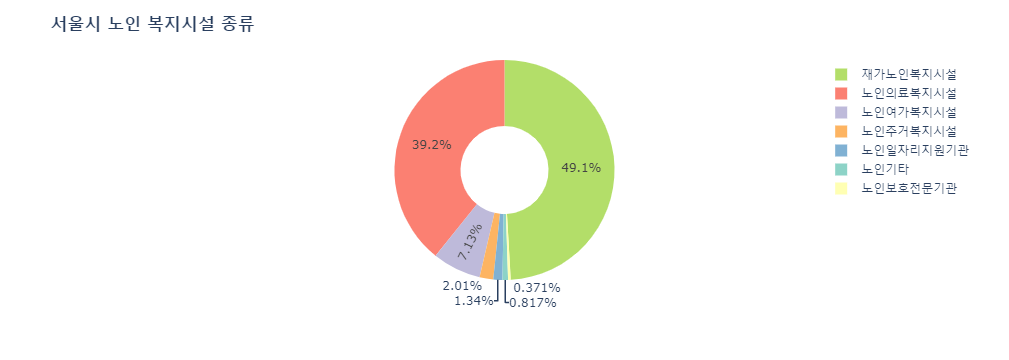

In [62]:
fig= px.pie(df_o, values='수', names='시설종류',hover_name="시설종류",color='시설종류',
                     color_discrete_sequence= px.colors.qualitative.Set3, hole=.4)
fig.update_layout(title= '<b>서울시 노인 복지시설 종류<b>')

fig.show()
fig.write_json("서울시노인복지시설종류.json", pretty=True)

## 장애인

In [63]:
disabled= df_dis.groupby(['자치구','시설종류상세명(시설종류)'])['자치구(시)구분'].count()
x= disabled.reset_index()
df_d= x.rename(columns={'자치구(시)구분':'수','시설종류상세명(시설종류)':'시설종류'})
df_d= df_d.groupby(by='시설종류').sum().reset_index()

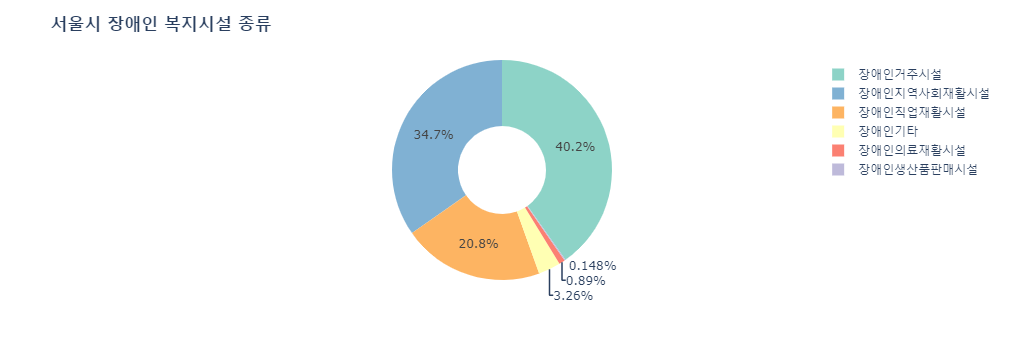

In [64]:
fig= px.pie(df_d, values='수', names='시설종류',hover_name="시설종류",color='시설종류',
                     color_discrete_sequence= px.colors.qualitative.Set3, hole=.4)
fig.update_layout(title= '<b>서울시 장애인 복지시설 종류<b>')

fig.show()
fig.write_json("서울시장애인복지시설종류.json", pretty=True)